## Proyecto 1 - Predicción de Enfermedades Cardíacas
Juan Camilo Bello - 201820698

Nicolas Ricaurte - 201621525

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
#Cargo el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

# Limpieza de datos

In [10]:
#Ver si cada columna tiene valores int
df.dtypes
#ver si cada columna tiene caracteres no numericos
df.apply(lambda x: sum(x.apply(type) == str), axis=0)
#Pasar todos los valores a numericos
df = df.apply(pd.to_numeric, errors='coerce')
#Ver si cada columna tiene valores nulos
df.isnull().sum()
#Eliminar las filas con valores nulos
df = df.dropna()
#Ver si cada columna tiene valores nulos
df.isnull().sum()
#Arreglar la columna num
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
#Ver si cada columna tiene valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Tarea 1 - Exploración de Datos

### Visualización de los datos

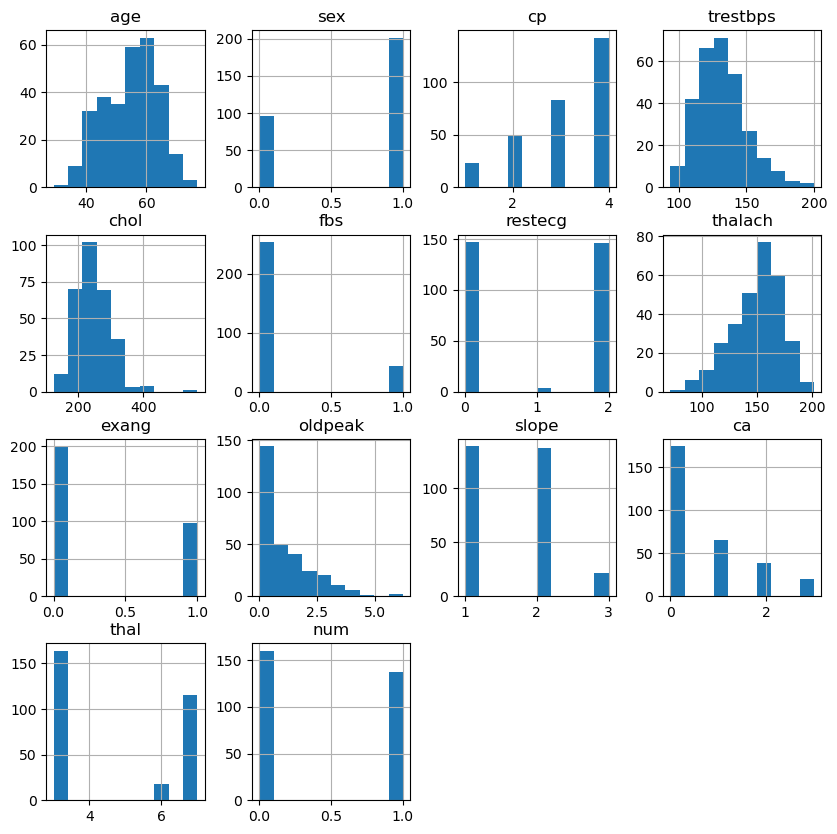

In [11]:
#Analisis de las variables numericas
df.hist(figsize=(10,10))
plt.show()

## Estadisticas descriptivas

### Total datos

In [12]:
#Total datos
print("Total de datos: ", len(df))

Total de datos:  297


### Edad

In [13]:
#Que porcentaje de personas son hombres?
df['sex'].value_counts(normalize=True) # Hay 201 hombres y 96 mujeres
#Total datos en el data set
df['sex'].value_counts()

1.0    201
0.0     96
Name: sex, dtype: int64

### Dolor torácico

In [14]:
#Para la variable cp
df['cp'].value_counts(normalize=True) #Hay un 54% de personas con angina tipo 2, un 23% con angina tipo 1, un 16% con angina tipo 3 y un 7% con angina tipo 4
df['cp'].value_counts() #Hay 165 personas con angina tipo 2, 75 con angina tipo 1, 50 con angina tipo 3 y 23 con angina tipo 4

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

### Presión Sistólica

In [15]:
#Para la variable trestbps
#cuantos pacientes se encuentran por debajo de 90?
print(df[df['trestbps'] < 90].shape) #Hay 0 pacientes
#cuantos pacientes se encuentran entre 90 y 120?
print(df[(df['trestbps'] >= 90) & (df['trestbps'] <= 120)].shape) #Hay 97 pacientes
#cuantos pacientes se encuentran entre 120 y 130?
print(df[(df['trestbps'] > 120) & (df['trestbps'] <= 130)].shape) #Hay 74 pacientes
#cuantos pacientes se encuentran entre 130 y 140?
print(df[(df['trestbps'] > 130) & (df['trestbps'] <= 140)].shape) #Hay 66 pacientes
#cuantos pacientes se encuentran entre 140 y 180+?
print(df[(df['trestbps'] > 140)].shape) #Hay 66 pacientes

(0, 14)
(97, 14)
(71, 14)
(63, 14)
(66, 14)


### Niveles de Colesterol

In [16]:
#Para la variable chol
#cuantos pacientes se encuentran por debajo de 200?
print(df[(df['chol'] <= 200)].shape) #Hay 50 pacientes
#cuantos pacientes se encuentran entre 200 y 239?
print(df[(df['chol'] > 200) & (df['chol'] <= 239)].shape) #Hay 97 pacientes
#cuantos pacientes se encuentran por encima de 240?
print(df[(df['chol'] >= 240)].shape) #Hay 156 pacientes

(49, 14)
(93, 14)
(155, 14)


### Glucemia en ayunas

In [17]:
#Para la variable fbs
df['fbs'].value_counts(normalize=True) #Hay un 85% de personas con fbs menor a 120 y un 15% con fbs mayor a 120
df['fbs'].value_counts() #Hay 258 personas con fbs menor a 120 y 45 con fbs mayor a 120

0.0    254
1.0     43
Name: fbs, dtype: int64

### Resultados electrocardiográficos en reposo

In [18]:
#Para la variable restecg
df['restecg'].value_counts(normalize=True) #Hay un 49% de personas con restecg normal, un 1% con restecg con anormalidad ST-T y un 48% con restecg con hipertrofia ventricular izquierda
df['restecg'].value_counts() #Hay 151 personas con restecg normal, 4 con restecg con anormalidad ST-T y 148 con restecg con hipertrofia ventricular izquierda

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

### Frecuencia cardíaca máxima

In [20]:
#Para la variable thalach
#Cuantos pacientes tienen su frecuencia cardiaca menor a 220 - su edad?
print(df[(df['thalach'] <= (220 - df['age']))].shape) #Hay 0 pacientes

(232, 14)


### Angina inducida por ejercicio

In [19]:
#Para la variable exang
df['exang'].value_counts(normalize=True) #Hay un 68% de personas con exang negativo y un 32% con exang positivo
df['exang'].value_counts() #Hay 204 personas con exang negativo y 99 con exang positivo

0.0    200
1.0     97
Name: exang, dtype: int64

### Depresión del segmento ST

In [21]:
#Para la variable oldpeak significa la depresión del ST inducida por el ejercicio en relación con el reposo
#Cuantos pacientes tienen oldpeak entre 0 y 1?
print(df[(df['oldpeak'] >= 0) & (df['oldpeak'] <= 1)].shape) #Hay 174 pacientes
#Cuantos pacientes tienen oldpeak entre 1 y 2?
print(df[(df['oldpeak'] > 1) & (df['oldpeak'] <= 2)].shape) #Hay 73 pacientes
#Cuantos pacientes tienen oldpeak entre 2 y 3?
print(df[(df['oldpeak'] > 2) & (df['oldpeak'] <= 3)].shape) #Hay 30 pacientes
#Cuantos pacientes tienen oldpeak entre 3 y 4?
print(df[(df['oldpeak'] > 3) & (df['oldpeak'] <= 4)].shape) #Hay 15 pacientes
#Cuantos pacientes tienen oldpeak entre 4 y 6.2?
print(df[(df['oldpeak'] > 4) & (df['oldpeak'] <= 6.2)].shape) #Hay 5 pacientes

(174, 14)
(73, 14)
(30, 14)
(15, 14)
(5, 14)


### Slope

In [22]:
#Para la variable slope
df['slope'].value_counts(normalize=True) #Hay 142 personas con slope = 1, 140 personas con slope = 2 y 15 personas con slope = 3
df['slope'].value_counts()
#1 es plano, 2 es inclinado y 3 es pronunciado

1.0    139
2.0    137
3.0     21
Name: slope, dtype: int64

### Número de arterias coloreadas por fluoroscopia

In [23]:
#Para la variable ca
df['ca'].value_counts(normalize=True) #Hay 174 personas con ca = 0, 65 personas con ca = 1, 38 personas con ca = 2, 20 personas con ca = 3
df['ca'].value_counts()
#0 es normal, 1 es defecto fijo, 2 es defecto reversible y 3 es defecto reversible

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

### Gammagrafía cardíaca con talio

In [24]:
#Para la variable thal
df['thal'].value_counts(normalize=True) #Hay 166 personas con thal = 3, 18 personas con thal = 6 y 2 personas con thal = 7
df['thal'].value_counts()
#3 es normal, 6 es defecto fijo y 7 es defecto reversible

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

### Variable de interés

In [25]:
#Para la variable num
df['num'].value_counts(normalize=True) #Hay 160 personas con num = 0 y 137 personas con num = 1
df['num'].value_counts()
#0 es no hay enfermedad y 1 es hay enfermedad

0    160
1    137
Name: num, dtype: int64

### Analísis de los datos

In [26]:

#Como se ve el dataset
df.shape 
#Hay valores nulos?
df.isnull().sum() #No hay valores nulos
#Hay valores duplicados?
df.duplicated().sum() #No hay valores duplicados

#Analisis de las variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Se tienen 303 datos en total donde cada variable se resume de la siguiente forma:

Edad: La media es 54 años, donde 29 es el min y 77 el max

Sexo: Hay 201 hombres y 96 mujeres en la base de datos

CP (Chest Pain) (Es una variable que se divide en 4 (1: Angina tipica, 2: Angina atipica, 3: Dolor no relacionado con la angina, 4: Asintomatico)): Hay 23 pacientes con angina tipo 1, 49 pacientes con angina tipo 2, 83 pacientes con angina tipo 3 y 142 pacientes con angina tipo 4.

trestbps (Resting blood preassure)(Se toma como la presion sistolica)(Baja: <90, Normal: <120, prehipertension: <130, Hypertension grado 1: <140, Hypertension grado 2: <180+): La media se encuentra en 131.69 mmHg, Baja: 0 pacientes, Normal: 97 pacientes, prehipertension: 71 pacientes, Hypertension grado 1: 63 pacientes, Hypertension grado 2: 66 pacientes.

chol (Serum cholestoral mg/dl) (Niveles de coresterol) (Prueba de sangre)(Sano: <200, En riesgo: <239, Peligroso: >240): La media se encuentra en 247.35 mg/dl, sano: 49 pacientes, en riesgo: 93 pacientes, peligroso: 155 pacientes.

fbs (Fasting blood sugar) (Glucemia en ayunas) (Prueba de sangre) (1 si es mayor a 120 mg/dl, 0 dlc): 254 tienen fbs menor a 120 y 45 mayor a 120.

restecg (Resting electrocardiographic results)(resultados electrocardiográficos en reposo)(0: normal, 1:Tener anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST >0,05 mVi, 2:hipertrofia ventricular izquierda probable o definida según los criterios de Estes) (Se necesita hacer un electrocardiograma): Hay 147 personas con restecg normal, 4 con restecg con anormalidad ST-T y 146 con restecg con hipertrofia ventricular izquierda.

Thalach (maximum heart rate achieved bpm) (Frecuencia cardiaca máxima alcanzada) (Normal: 220 - Edad >= Thalach): La media se encuentra en 149.6 bpm. Hay 232 pacientes normal anormal 65 pacientes.

exang (exercise induced angina) (Angina inducida por ejercicio) (1: si, 0: no): Hay 200 pacientes sin exang y 97 con exang.

oldpeak (ST depression induced by exercise relative to rest): Entre 0-1: 174, entre 1-2: 73, entre 2-3: 30, entre 3-4:15, entre 4-6.2: 5.

slope (the slope of the peak exercise ST segment): 1: 139, 2:137, 3:21 1: Plano, 2: Inclinado, 3: Pronunciado

ca (Numero de arterias coloreadas por fluoroscopia): Hay 174 personas con ca = 0, 65 personas con ca = 1, 38 personas con ca = 2, 20 personas con ca = 3

thal (Gammagrafía cardíaca con talio): 

num (El objetivo): 0 = disease, 1 = no disease





<AxesSubplot:title={'center':'Enfermedad cardiaca'}>

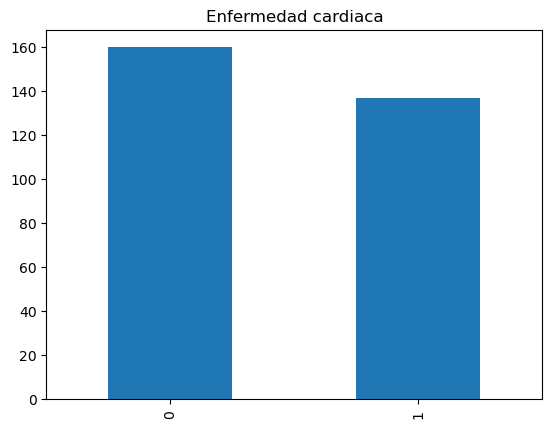

In [27]:
#Analisis de la variable num
df['num'].value_counts() #Hay 164 pacientes con enfermedad cardiaca y 139 sin enfermedad cardiaca
#Grafico de la variable num
df['num'].value_counts().plot(kind='bar', title='Enfermedad cardiaca')
#si es 0 no tiene enfermedad cardiaca, si es diferente de 0 tiene enfermedad cardiaca y el numero indica la severidad de la enfermedad

### Matriz correlación

<AxesSubplot:>

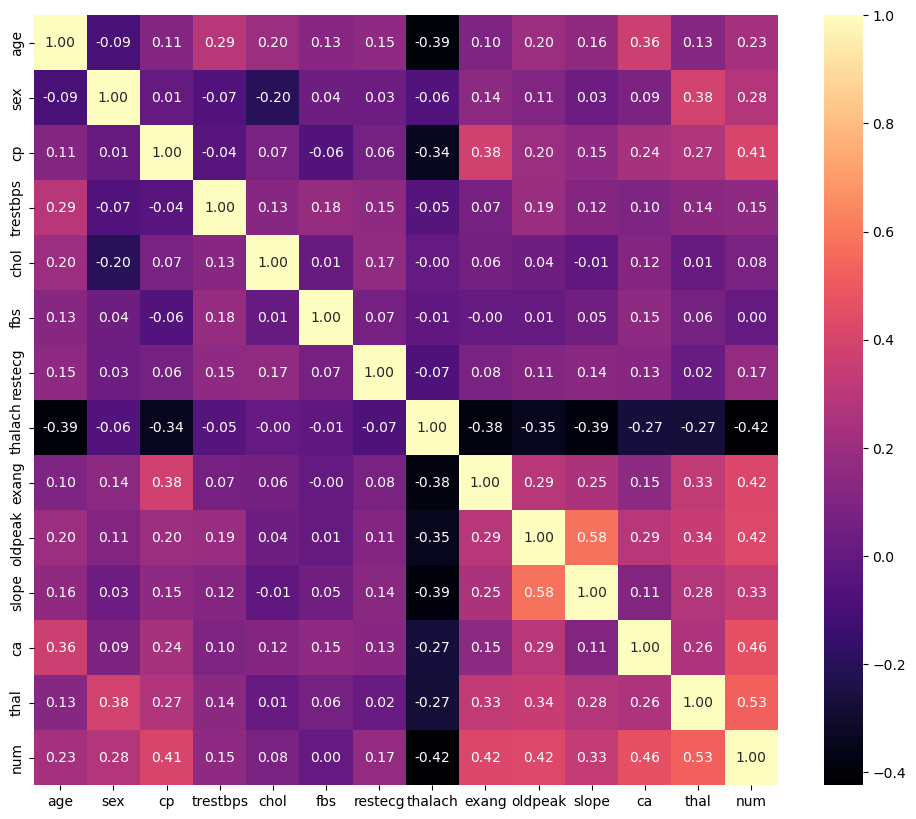

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [29]:
#Encontrar valor maximo de las correlaciones
corr = df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

### Desarrollo Modelo Bayesiano

In [2]:
# Importamos las bibliotecas necesarias
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import pandas as pd

# Cargamos los datos del archivo CSV
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"], na_values='?')

# Eliminamos filas con valores faltantes
df = df.dropna()

# Convertimos la columna de diagnóstico en un valor binario
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Creamos el modelo bayesiano
model = BayesianModel([('age', 'trestbps'), ('age', 'chol'), ('sex', 'cp'), ('cp', 'thalach'), ('cp', 'restecg'),
                       ('thalach', 'exang'), ('exang', 'slope'), ('slope', 'ca'), ('ca', 'thal'), ('thal', 'num')])

# Estimamos las distribuciones de probabilidad usando MLE
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Estimamos las distribuciones de probabilidad usando MLE y BayesianEstimator
model.fit(df, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Hacemos inferencias en el modelo bayesiano
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# Ejemplo de inferencia para un paciente de 60 años, hombre, con dolor torácico tipo 2, presión arterial en reposo de 145, colesterol de 233, sin ayuno de azúcar en sangre,
# electrocardiograma en reposo normal, frecuencia cardíaca máxima alcanzada durante el ejercicio de 142, sin angina inducida por ejercicio, depresión del segmento ST de 2.4,
# pendiente del segmento ST de plano, 1 vaso sanguíneo coloreado por flourosopía y una Thal de 3
q = infer.query(['num'], evidence={'age': 60, 'sex': 1, 'cp': 2, 'trestbps': 145, 'chol': 233, 'restecg': 0,
                                       'thalach': 142, 'exang': 0, 'slope': 2, 'ca': 1, 'thal': 3})
print(q)


+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.7689 |
+--------+------------+
| num(1) |     0.2311 |
+--------+------------+


/Users/juancbello/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Users/juancbello/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


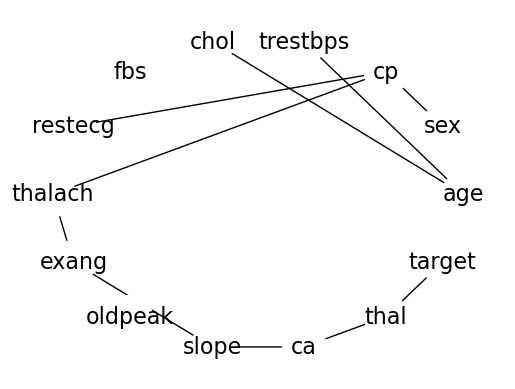

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un objeto de tipo DiGraph
G = nx.DiGraph()

# Agregar nodos al grafo
G.add_nodes_from(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

# Agregar arcos al grafo
G.add_edges_from([('age', 'trestbps'), ('age', 'chol'), ('sex', 'cp'), ('cp', 'thalach'), ('cp', 'restecg'),
                  ('thalach', 'exang'), ('exang', 'slope'), ('slope', 'ca'), ('ca', 'thal'), ('thal', 'target')])

# Definir la posición de cada nodo
pos = nx.circular_layout(G)

# Dibujar la red bayesiana
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True, width=1)

plt.axis('off')
plt.show()
